In [196]:
#Cargar las librerias necesrias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [197]:
# lectura de datos en Python y lo cargamos en la variable Datos

titanic = pd.read_csv('C:\Tarea5\Titanic-Dataset.csv')

In [198]:
# Realizamos lectura de los Datos para el análisis exploratorio

titanic.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [199]:
#Implementamos un cambio en nuestro dataset, cambiando el tipo de dato de acuerdo al sexo. 0 masculino y 1 femenino

titanic['Sex'] = titanic ['Sex'].replace({'male': 0, 'female':1}) 

In [200]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [201]:
# Descripción de los datos

titanic.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [202]:
titanic.drop(['PassengerId', 'Name','Ticket','Cabin','Embarked'], axis=1, inplace=True)

In [203]:
# Realizamos lectura de los Datos para el análisis exploratorio

titanic.head(100)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
95,0,3,0,NaN,0,0,8.0500
96,0,1,0,71.0,0,0,34.6542
97,1,1,0,23.0,0,1,63.3583
98,1,2,1,34.0,0,1,23.0000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

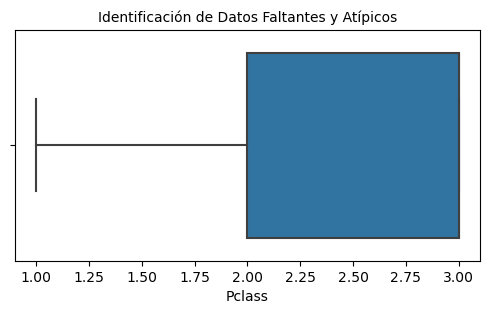

In [204]:
#Identificación de Datos Faltantes y Atípicos "Pclass"

plt.figure(figsize=(6, 3))
sns.boxplot(x=titanic['Pclass'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

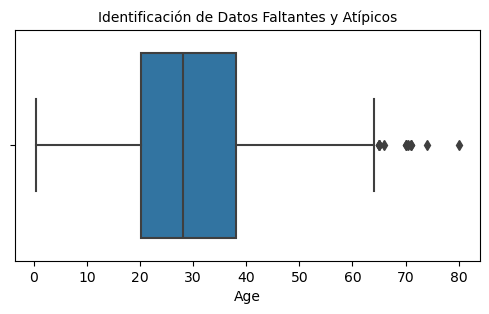

In [205]:
#Identificación de Datos Faltantes y Atípicos "Age"

plt.figure(figsize=(6, 3))
sns.boxplot(x=titanic['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

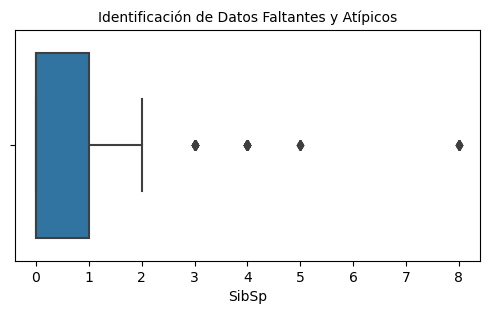

In [206]:
#Identificación de Datos Faltantes y Atípicos "SibSp"

plt.figure(figsize=(6, 3))
sns.boxplot(x=titanic['SibSp'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [207]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Pclass: ",titanic['Pclass'].isin([0]).sum())
print("Cantidad de Registros con cero en Age: ",titanic['Age'].isin([0]).sum())


Cantidad de Registros con cero en Pclass:  0
Cantidad de Registros con cero en Age:  0


In [208]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

titanic['Pclass']=titanic['Pclass'].replace(0,titanic['Pclass'].mean())
titanic['Age']=titanic['Age'].replace(0,titanic['Age'].mean())

In [209]:
#Revisión nuevamente de datos faltantes

print("Cantidad de Registros con cero en Pclass: ",titanic['Pclass'].isin([0]).sum())
print("Cantidad de Registros con cero en Age: ",titanic['Age'].isin([0]).sum())

Cantidad de Registros con cero en Pclass:  0
Cantidad de Registros con cero en Age:  0


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

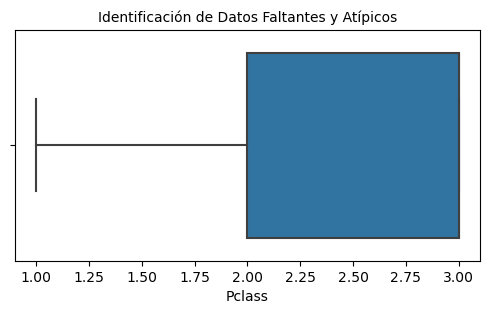

In [210]:
#Identificación de Datos Faltantes y Atípicos "Pclass"

plt.figure(figsize=(6, 3))
sns.boxplot(x=titanic['Pclass'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

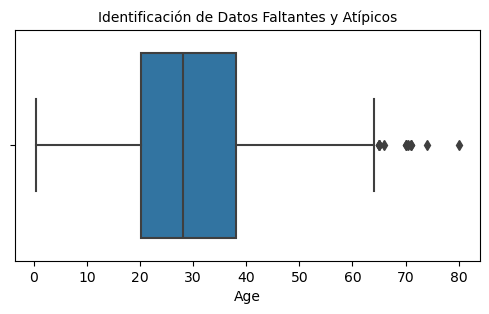

In [211]:
#Identificación de Datos Faltantes y Atípicos "Age"

plt.figure(figsize=(6, 3))
sns.boxplot(x=titanic['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

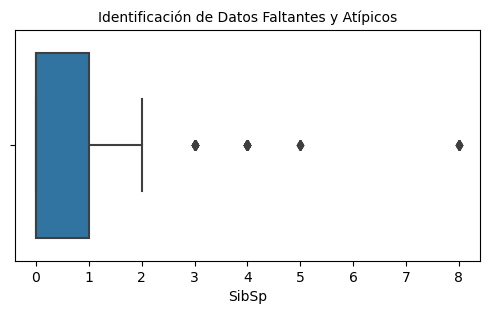

In [212]:
#Identificación de Datos Faltantes y Atípicos "SibSp"

plt.figure(figsize=(6, 3))
sns.boxplot(x=titanic['SibSp'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [213]:
#Conteo de Datos Atípicos "Clase de billete"

ClaseBillete_minimo=1
ClaseBillete_maximo=3

Total_Atipicos=((titanic['Pclass']<ClaseBillete_minimo)|(titanic['Pclass']>ClaseBillete_maximo)).sum()
print("El total de datos atípicos de la Clase de billete es {}".format(Total_Atipicos))

#Conteo de Datos Atípicos "Edad"

Edad_minimo=1
Edad_maximo=100

Total_Atipicos=((titanic['Age']<Edad_minimo)|(titanic['Age']>Edad_maximo)).sum()
print("El total de datos atípicos de la Clase de billete es {}".format(Total_Atipicos))

El total de datos atípicos de la Clase de billete es 0
El total de datos atípicos de la Clase de billete es 7


In [214]:
# Filtra Datos Atípicos "Clase de Billete"

titanic=titanic[(titanic['Pclass']<ClaseBillete_maximo)&(titanic['Pclass']>ClaseBillete_minimo)]

# Filtra Datos Atípicos "Clase de Billete"

titanic=titanic[(titanic['Age']<Edad_maximo)&(titanic['Age']>Edad_minimo)]


In [215]:
# Validar si se removieron los datos atípicos "Clase de billete"

Total_Atipicos=((titanic['Pclass']<ClaseBillete_minimo)|(titanic['Pclass']>ClaseBillete_maximo)).sum()
print("El total de datos atípicos de la Clase de billete es {}".format(Total_Atipicos))

# Validar si se removieron los datos atípicos "Edad"

Total_Atipicos=((titanic['Age']<Edad_minimo)|(titanic['Age']>Edad_maximo)).sum()
print("El total de datos atípicos de la Edad e es {}".format(Total_Atipicos))

El total de datos atípicos de la Clase de billete es 0
El total de datos atípicos de la Edad e es 0


In [216]:
#Revisión del tipo de datos y datos faltantes

titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 9 to 886
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  168 non-null    int64  
 1   Pclass    168 non-null    int64  
 2   Sex       168 non-null    int64  
 3   Age       168 non-null    float64
 4   SibSp     168 non-null    int64  
 5   Parch     168 non-null    int64  
 6   Fare      168 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 10.5 KB


In [217]:
# Total de personas que sobrevivierón

titanic['Survived'].value_counts()

Survived
0    90
1    78
Name: count, dtype: int64

In [218]:
titanic[['Survived']].head(40)

,Survived
9,1
15,1
20,0
21,1
33,0
41,0
43,1
53,1
56,1
58,1


In [219]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = titanic.drop('Survived',axis=1) # Se cargan los datos de train sin los datos de la columna Condicion 
Y = titanic['Survived'] # Se cargan los datos de train con los datos de la la columna Condicion 

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [220]:
print (X_train)

     Pclass  Sex   Age  SibSp  Parch     Fare
242       2    0  29.0      0      0  10.5000
357       2    1  38.0      0      0  13.0000
658       2    0  23.0      0      0  13.0000
15        2    1  55.0      0      0  16.0000
865       2    1  42.0      0      0  13.0000
..      ...  ...   ...    ...    ...      ...
199       2    1  24.0      0      0  13.0000
432       2    1  42.0      1      0  26.0000
292       2    0  36.0      0      0  12.8750
345       2    1  24.0      0      0  13.0000
866       2    1  27.0      1      0  13.8583

[126 rows x 6 columns]


In [221]:
print (Y_train)

242    0
357    0
658    0
15     1
865    1
      ..
199    0
432    1
292    0
345    1
866    1
Name: Survived, Length: 126, dtype: int64


In [222]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [223]:
print (Y_test)

123    1
883    0
317    0
854    0
134    0
427    1
21     1
886    0
288    1
728    0
747    1
472    1
43     1
458    1
626    0
684    0
9      1
145    0
234    0
426    1
526    1
417    1
722    0
342    0
864    0
714    0
695    0
801    1
217    0
344    0
219    0
439    0
463    0
841    0
322    1
535    1
615    1
874    1
600    1
418    0
672    0
608    1
Name: Survived, dtype: int64


In [224]:
print (Prediccion)

[1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1
 1 1 0 0 1]


In [225]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        23
           1       0.94      0.89      0.92        19

    accuracy                           0.93        42
   macro avg       0.93      0.93      0.93        42
weighted avg       0.93      0.93      0.93        42



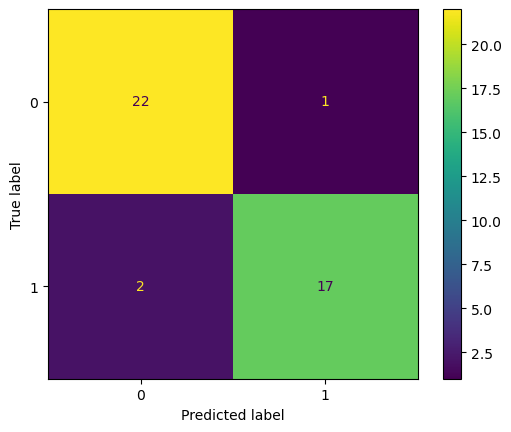

In [226]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

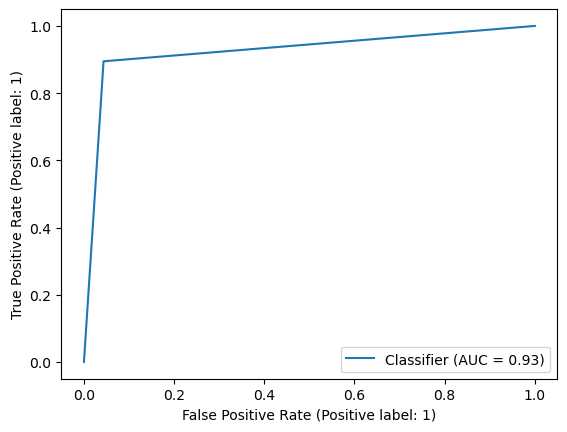

In [227]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()